# World development indicators data set



## Introduction
Globalization increased interdependence between countries in terms of trade and technology. Globalization also allwoed international companies to expand to multiple countires. Globalization also seemed to have caused increase in enegy consumption by countries. This inturn casues CO2 emissions to go up in these countries. 
In recent climate change conferences developing countries are considered to be big pollutors. Developing economies have energy needs to support their economies and lead to pollution. Developed countries were asked to innovate ways to curb the growing emissions. In this article I choose to look at 3 countries, USA, India and China to look into globalization inde and energy consumption. 

I also belive that increased energy consumption and industrialization caused an increase in GDP of countries. There are many indicators of quality of life. In this article I want to use GDP as one of the indicators to indetify increase in wealth of the citizens of hte countries. 

## Questions to explore
I want to understand how globalization has shifted energy needs from developed countries to developing countries.  If globalization helped developing economies support their citizens they could be paying a price in pollution which could be impacting the health. 

My hypothesis is globalizaton increased energy consumption for developing economies and decreased the enery consumption of developed countries. 

The second quesion I want to pursue is improvement in quality of life in developing countries as a result of globalization. 
This is very broad question we can answer this with GDP, mortality rate, education and health metrics. 

My hypothesis is globalization improved the quality of life developing countries. 

## Data set
The data set to use for this analysis is [world development indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators). This data has close to 1600 indicators. Energy consumption and infrastructure metrics are tracked on a per country level. More information on the indicators can be found [here](https://data.worldbank.org/indicator).
This data is public and uses CC-BY 4.0 licenses. It is permitted to download, redistribute the data with proper attribution 


KOF Globalisation Index is used to track the spread of globalization of each contries. The data set is avilable for download [here](https://ethz.ch/content/dam/ethz/special-interest/dual/kof-dam/documents/Medienmitteilungen/Globalisierungsindex/KOFGI_2020_public.xlsx) The inde tracts 23 variables for each country and computes an index. The index is computed as described [here](https://ethz.ch/content/dam/ethz/special-interest/dual/kof-dam/documents/Medienmitteilungen/Globalisierungsindex/KOFGI_2020_method.pdf) Description of the variables is provided [here](https://ethz.ch/content/dam/ethz/special-interest/dual/kof-dam/documents/Medienmitteilungen/Globalisierungsindex/KOFGI_2020_variables.pdf) In this article I use the final index rather than individual values of the globalization index. I couldn't find an attached license to data but its available for download publicly. 

Copy of the data can be downloaded by python code below. The script assumes an active network connection to pull the data from its sources.

## Analysis

The analysis in this case is mostly exploratory. I want to consider data from year 1970 onwards. There are enegry indicators for each country in the list. In the total energy consumption the indicator of interest is amount of energy imported. I want to look at energy consumption of countries like India, China and compare that to developed countries like USA countries. For the second question I am going to use GDP of economies. 

In [2]:
import pandas as pd 
import os 
import requests
import matplotlib.pyplot as plt
import zipfile

Next section of code downloads the data from the data source.  World Data indicators is downloaded in compressed format. After downlaod is complete data is extracted to data folder. Globalization data set is downloaded in excel format.

The total download time varies based on download speeds. You can retry this method multiple times if download fails.

In [5]:
data_folder = 'data'
compressed_file = os.path.join(data_folder, 'wdi_data.zip')
wdi_download_url = 'http://databank.worldbank.org/data/download/WDI_csv.zip'
koi_globalization_url = 'https://ethz.ch/content/dam/ethz/special-interest/dual/kof-dam/documents/Medienmitteilungen/Globalisierungsindex/KOFGI_2020_public.xlsx'

def download_data_from_world_bank_source():

    h = requests.head(wdi_download_url, allow_redirects=True)
    header = h.headers
    content_length = header.get('content-length', None)
    print('Size of file to download {}'.format(content_length))
    if not os.path.exists(data_folder):
        os.makedir(data_folder)
    resp = requests.get(wdi_download_url, allow_redirects=True)
    open(compressed_file, 'wb').write(resp.content)
    print("Downloaded data to {}".format(compressed_file))

def download_data_from_KOI_source():
    if not os.path.exists(data_folder):
        os.makedir(data_folder)
    resp = requests.get(koi_globalization_url, allow_redirects=True)
    open('KOFGI_2020_public.xlsx', 'wb').write(resp.content)
    print("Downloaded data to {}".format('KOFGI_2020_public.xlsx'))

        
def extract_data(): 
    with zipfile.ZipFile(compressed_file, 'r') as zip_data:
        zip_data.extractall(data_folder)
    print("Extracted file {} to folder {}".format(compressed_file, data_folder))

download_data_from_KOI_source()    
download_data_from_world_bank_source()
extract_data()

# load data from 



Downloaded data to KOFGI_2020_public.xlsx
Size of file to download 66477592


ChunkedEncodingError: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))

World bank data has multiple files in the compressed folder. Here is a list of files 
* WDICountry-Series.csv
* WDICountry.csv
* WDIData.csv
* WDIFootNote.csv
* WDISeries-Time.csv
* WDISeries.csv

The file I am interested inis WDIData.csv. 


# Analysis

In the following sections, i perfrom basic exploratory analysis of the data. I start with plotting globalization index for the the three countries. I start by reading the data previosuly downloaded. Data for globalization is plotted first then , gdp and energy consumption. Globalizaton data is read into a pandas data frame. The year columns of the dataframe is marked as index for the frame. This is useful in plotting the data as time series data. 

In [7]:
wdidata_df_orig = pd.read_csv('data/WDIData.csv')
globalization_df = pd.read_excel('data/KOFGI_2020_public.xlsx')
country_code = ['IND', 'CHN', 'USA']
globalization_df.set_index('year', inplace=True)

Text(0, 0.5, 'KOF Globalization Index')

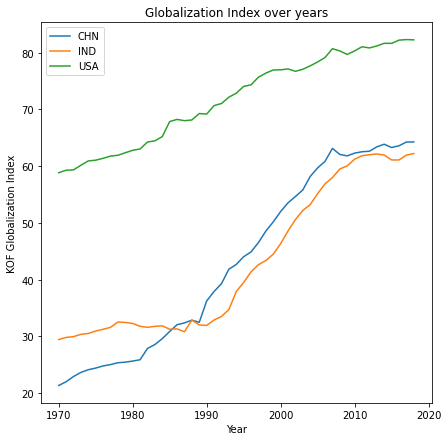

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
globalization_df[globalization_df['code'].isin(country_code)].groupby('code')['KOFGI'].plot(legend=True, title='Globalization Index over years', )
ax.set_xlabel('Year')
ax.set_ylabel('KOF Globalization Index')

From the graph above its evident that globalization increased significantly in the two developoing economies, albeit its slowing down in recent years. There seems to be a correlation between the time series data of three countries. 

# Energy Consumption and GDP graphs. 

To analyze world data indicators I used Electric power consumption (kWh per capita) and GDP (current US$ of the countries. World data indicators have years as columns instead of rows. To make is easy to parse and plot i used pandas melt function to pivot columns into rows. The section of code below walks through these stepa and plots data. 

In [70]:
# emission columns. There are multiple indicators for this 
greenhouse_gases = 'Total greenhouse gas emissions (kt of CO2 equivalent)'
Electric_power_consumption = 'EG.USE.ELEC.KH.PC'
energy_oil_percapita = 'EG.USE.PCAP.KG.OE'
energy_kw_percapita = 'EG.USE.ELEC.KH.PC'
gdp_per_capita = 'NY.GDP.MKTP.CD'
gdp_growth_percent = 'NY.GDP.MKTP.KD.ZG'
wdidata_df_orig.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN


In [71]:
encergy_consumption_df = wdidata_df_orig[(wdidata_df_orig['Indicator Code'].isin([gdp_per_capita, gdp_growth_percent, energy_kw_percapita]) ) & (wdidata_df_orig['Country Code'].isin(country_code))]

In [72]:
encergy_consumption_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
127067,China,CHN,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,3.474988e+03,3.773405e+03,3.927044e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127187,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,...,8.532231e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.434290e+13,NaN,NaN
127190,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-2.727000e+01,-5.580000e+00,1.030000e+01,1.818000e+01,1.695000e+01,...,7.859627e+00,7.768615e+00,7.424524e+00,7.041856e+00,6.848728e+00,6.946200e+00,6.751614e+00,6.108561e+00,NaN,NaN
196187,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,7.232355e+02,7.641987e+02,8.045142e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196307,India,IND,GDP (current US$),NY.GDP.MKTP.CD,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955485e+10,...,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.652755e+12,2.713165e+12,2.875142e+12,NaN,NaN


In [76]:
pivot_df = pd.melt(encergy_consumption_df, id_vars=['Country Code', 'Indicator Code'], value_vars=[str(x)  for x in range(1970,2020)])
pivot_df.set_index('variable', inplace=True)

## Pivoting table 
This is how the pivoted data looks like. Notice year is in one coulmn instead of several columns in the original row.

In [77]:
pivot_df.head()

,Country Code,Indicator Code,value
variable,,,
1970,CHN,EG.USE.ELEC.KH.PC,NaN
1970,CHN,NY.GDP.MKTP.CD,9.260297e+10
1970,CHN,NY.GDP.MKTP.KD.ZG,1.930000e+01
1970,IND,EG.USE.ELEC.KH.PC,NaN
1970,IND,NY.GDP.MKTP.CD,6.242248e+10


Text(0, 0.5, 'GDP (current US$)')

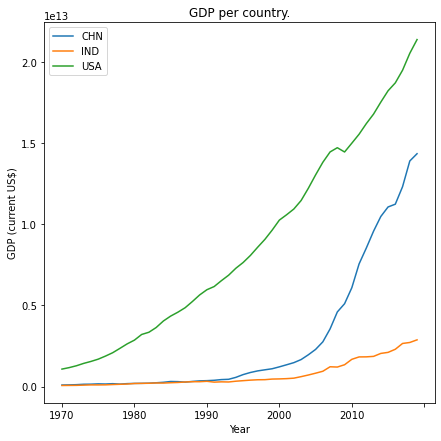

In [88]:
fig, ax = plt.subplots(figsize=(7,7))
pivot_df[pivot_df['Indicator Code']== gdp_per_capita].groupby('Country Code')['value'].plot(legend=True, title='GDP per country.', )
ax.set_xlabel('Year')
ax.set_ylabel('GDP (current US$)')

Text(0, 0.5, 'Electric power consumption (kWh per capita)')

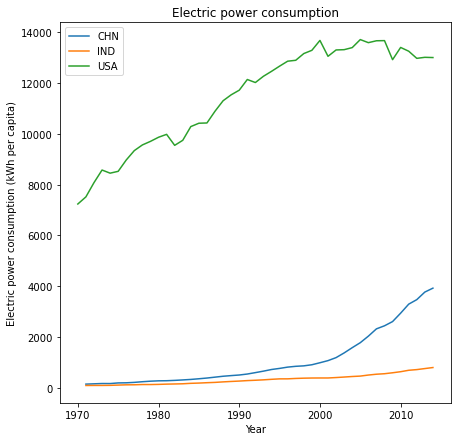

In [90]:
fig, ax = plt.subplots(figsize=(7,7))
pivot_df[pivot_df['Indicator Code']== 'EG.USE.ELEC.KH.PC'].groupby('Country Code')['value'].plot(legend=True, title='Electric power consumption', )
ax.set_xlabel('Year')
ax.set_ylabel('Electric power consumption (kWh per capita)')

# Findings

The three plots above are very similar for all the three countries. Developed country like USA is ina different band than developing economies. This might not be true for all developed economies that need to be ivestigated. 
* Power consumption. 
All three countries seem to be consuming more energy as time progressed. Energy consumption seems to be related to globalization index. Overall the trends are the same. USA started seeinga decrease in energy consumption towards the end of the curve. I didn't have time to investigate the reasons here but according to paper presented, this could be related to enery efficiency gains. 

* GDP
Overall gdp for all three coutnries increaed over the years. China seemed to have gained more than India overall. This again seems to be related to GLobalizations. 

# Next steps. 

In order to conclusively prove the above coreleation. I want to build pearson corelation between these time series data at a minimum. There are more advanced casaulity models for time series data that I came accross in literature that I need time to udnerstand. It will be workthwhile to investigate this further. 